# Exercise 5 - Higher-Order Regression
### Task
Implement a higher order regression model. The class structure is provided and identical to the one provided in exercise 4. Add the following four member functions:
- the forward prediction
- the cost function computation
- the gradient computation
- the training algorithm

### Learning goals
- Understand the foundational steps of machine learning by implementing each of the components
- Understand the principle of gradient descent for multiparameter optimization

In [16]:
import numpy as np
import matplotlib.pyplot as plt

**generate the data**

Os dados simulam uma função quadrática invertida: y=−x^2+10
Foi adicionado ruído intencional em um ponto de treinamento para testar a robustez do modelo frente a outliers.

In [17]:
np.random.seed(10)  # Generate the data.
xTrain = np.array([-1.0, -0.8, -0.2, 0.5, 0.7])
yTrain = -(xTrain ** 2) + 10.0
yTrain[3] -= 0.2
xTest = np.array([-1.1, -0.6, 0.1, 0.3])
yTest = -(xTest ** 2) + 10.0

**model definition**

Criamos uma classe HigherOrderRegression com os seguintes componentes:
Parâmetros:
- **polynomialDegree:** grau do polinômio a ser ajustado.
- **regularization:** termo opcional de regularização L2 para evitar overfitting.

**def forward(self, x):** O loop soma cada termo do polinômio de forma incremental.

**def costFunction(self, x, y):** A função de custo usada é:

- Erro quadrático médio (MSE) como base
- Se regularization estiver ativado, é adicionado um termo L2 que penaliza pesos muito altos.

Isso ajuda a suavizar o modelo e evitar overfitting.


**def gradient(self, x, y):** Calcula os gradientes dos parâmetros (pesos e bias) para atualização com gradiente descendente. Se a regularização estiver ativada, o gradiente também é ajustado com o termo L2.
- O bias não é penalizado na regularização L2 por padrão aqui, por escolha da implementação.

In [18]:
class HigherOrderRegression:
    def __init__(self, polynomialDegree, regularization=None):
        self.polynomialDegree = polynomialDegree
        self.regularization = regularization
        self.weights = np.zeros(polynomialDegree)
        self.bias = 0

    def forward(self, x):
        y = self.bias
        for i in range(self.polynomialDegree):
            y += self.weights[i] * x ** (i + 1)
        return y

    def costFunction(self, x, y):
        cost = np.mean((self.forward(x) - y) ** 2)
        if self.regularization == None:
            return cost
        else:
            return cost + self.regularization * (np.sum(self.weights ** 2) + self.bias ** 2)

    def gradient(self, x, y):
        gradientWeights = np.zeros(self.polynomialDegree)
        gradientBias = 2 * (self.forward(x) - y)  # holds all values w.r.t. x
        for i in range(self.polynomialDegree):
            gradientWeights[i] = np.mean(gradientBias * x ** (i + 1))
        gradientBias = np.mean(gradientBias)
        if self.regularization != None:
            for i in range(self.polynomialDegree):
                gradientWeights[i] += 2 * self.regularization * self.weights[i]
            # gradientBias += 2 * self.regularization * self.bias # this might seem like a good idea, but is not (see Chapter 2)
        return gradientWeights, gradientBias

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
        for epoch in range(epochs):
            costTrain = self.costFunction(xTrain, yTrain)
            costTest = self.costFunction(xTest, yTest)
            gradientWeights, gradientBias = self.gradient(xTrain, yTrain)
            self.weights -= lr * gradientWeights
            self.bias -= lr * gradientBias
            if epoch % 100 == 0:
                string = (
                    "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
                )
                print(string.format(epoch, epochs, costTrain, costTest))

**model training**

- O modelo é treinado por 1000 épocas com taxa de aprendizado de 0.1.
- A cada 100 épocas, os custos de treino e validação são exibidos.

In [19]:
polynomialDegree = 3
lr = 1e-1
epochs = 1000

model = HigherOrderRegression(polynomialDegree)
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)

Epoch: 0/1000		Training cost = 8.99e+01		Validation cost = 9.21e+01
Epoch: 100/1000		Training cost = 1.22e-01		Validation cost = 2.52e-01
Epoch: 200/1000		Training cost = 1.54e-02		Validation cost = 6.97e-02
Epoch: 300/1000		Training cost = 4.75e-03		Validation cost = 4.88e-02
Epoch: 400/1000		Training cost = 3.41e-03		Validation cost = 4.34e-02
Epoch: 500/1000		Training cost = 3.03e-03		Validation cost = 3.98e-02
Epoch: 600/1000		Training cost = 2.80e-03		Validation cost = 3.69e-02
Epoch: 700/1000		Training cost = 2.63e-03		Validation cost = 3.44e-02
Epoch: 800/1000		Training cost = 2.49e-03		Validation cost = 3.23e-02
Epoch: 900/1000		Training cost = 2.39e-03		Validation cost = 3.05e-02


**visualize the prediction**

Utilizamos 100 pontos uniformemente espaçados para plotar a curva ajustada.
- Dados de treino (preto)
- Dados de teste (vermelho)
- Curva predita (preto contínuo)

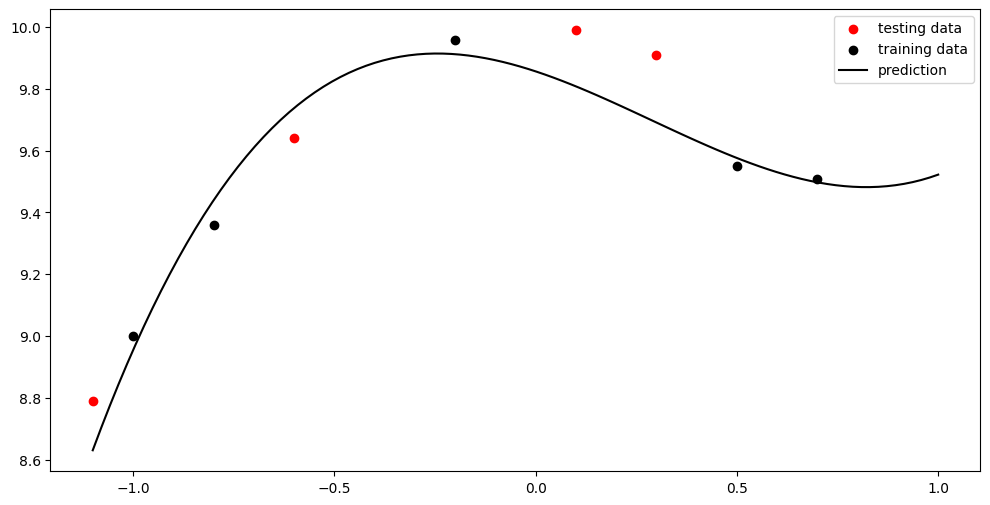

In [20]:
yTrainPred = model.forward(xTrain)  # not visualized
yTestPred = model.forward(xTest)  # not visualized

x = np.linspace(-1.1, 1, 100)
yPred = model.forward(x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(xTest, yTest, color="r", label="testing data")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.plot(x, yPred, "k", label="prediction")
ax.legend()
plt.show()